<a href="https://colab.research.google.com/github/KumudaBG/CMPE-297-Special-Topics-Assignments/blob/main/Assignment4/image_task_autoviml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install deep_autoviml

     |████████████████████████████████| 139 kB 7.0 MB/s 
     |████████████████████████████████| 454.4 MB 9.8 kB/s 
     |████████████████████████████████| 23.2 MB 138 kB/s 
     |████████████████████████████████| 308 kB 47.5 MB/s 
     |████████████████████████████████| 170 kB 55.5 MB/s 
     |████████████████████████████████| 4.3 MB 44.8 MB/s 
     |████████████████████████████████| 14.5 MB 33 kB/s 
     |████████████████████████████████| 1.2 MB 53.0 MB/s 
     |████████████████████████████████| 462 kB 58.8 MB/s 
     |████████████████████████████████| 4.0 MB 54.4 MB/s 
     |████████████████████████████████| 80 kB 11.8 MB/s 
     |████████████████████████████████| 209 kB 37.9 MB/s 
     |████████████████████████████████| 75 kB 5.5 MB/s 
     |████████████████████████████████| 111 kB 61.9 MB/s 
     |████████████████████████████████| 144 kB 64.7 MB/s 
     |████████████████████████████████| 49 kB 8.8 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 s

In [1]:
from deep_autoviml import deep_autoviml as deepauto
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import optuna 
from tensorflow.keras.optimizers import SGD, Adam 
from tensorflow.keras.layers import Dropout, BatchNormalization, GaussianNoise 
from storm_tuner import Tuner 
from tensorflow import keras
import json
import io,os


Imported deep_auto_viml. version=0.0.68
from deep_autoviml import deep_autoviml as deepauto
-------------------
model, cat_vocab_dict = deepauto.fit(train, target, keras_model_type="fast",
		project_name="deep_autoviml", keras_options=keras_options,  
		model_options=model_options, save_model_flag=True, use_my_model='',
		model_use_case='', verbose=0)

predictions = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)
                                


In [2]:
#Import kaggle data
kaggle_json = {"username":"kumudabg","key":"1134be2d95490124194bf94fac598ce7"}

os.makedirs('/content/.kaggle/',exist_ok=True)

os.makedirs('/root/.kaggle/',exist_ok=True)

with open('/content/.kaggle/kaggle.json', 'w') as file:
  json.dump(kaggle_json, file)

!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle datasets download -d puneet6060/intel-image-classification

 97% 337M/346M [00:08<00:00, 40.2MB/s]
100% 346M/346M [00:08<00:00, 41.8MB/s]


In [25]:
!unzip /content/intel-image-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

In [4]:
from deep_autoviml import deep_autoviml as deepauto
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import shutil

In [16]:
!mkdir data_folder

In [6]:
shutil.move("/content/seg_test/seg_test/","/content/data_folder")

'/content/data_folder/seg_test'

In [20]:
shutil.move("/content/seg_train/seg_train/","/content/data_folder")

'/content/data_folder/seg_train'

In [8]:
BATCHSIZE = 256
CLASSES = 10
EPOCHS = 3
NUM_TRIALS = 5

img_height = 224
img_width = 224
img_channels = 3

In [27]:
image_dir='/content/data_folder'
test_image_dir='/content/data_folder/seg_test/'
train_image_dir='/content/data_folder/seg_train/'
target ='image'


In [28]:

keras_model_type =  "image" ## always try "auto" first, then "basic", "deep", "big deep", "giant deep", "cnn1" etc.
keras_options = {"early_stopping": True, 'lr_scheduler': 'rlr', "epochs": 3}  ### always set early_stopping to True first and then change it to False
model_options = {'tuner':"optuna", "max_trials":2, 'cat_feat_cross_flag':True, 
                 'image_directory':image_dir,'image_height': img_height, 
                 'image_width':img_width, 'image_channels':img_channels }
## always set the tuner to "storm" first and then "optuna"
#### You always need 15 max_trials to get something decent #####

    Only CPU found on this device
Setting CPU strategy using 1 devices
    Image directory given as /content/data_folder
For image use case:
    Image height given as 224
    Image width given as 224
    Image channels given as 3
No validation folder found under given image directory /content/data_folder. Returning...
Found 11224 files belonging to 6 classes.

Splitting train into two: train and validation data
Number of image classes = 6 and they are: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
Training image model. This will take time...
Epoch 1/3
88/88 [==============================] - 220s 2s/step - loss: 0.6046 - accuracy: 0.7702 - val_loss: 0.2917 - val_accuracy: 0.8989
Epoch 2/3
88/88 [==============================] - 190s 2s/step - loss: 0.3027 - accuracy: 0.8852 - val_loss: 0.2438 - val_accuracy: 0.9178
Epoch 3/3
36/36 [==============================] - 55s 2s/step - loss: 0.2210 - accuracy: 0.9240
    Model accuracy in Image validation data: 0.9240282773

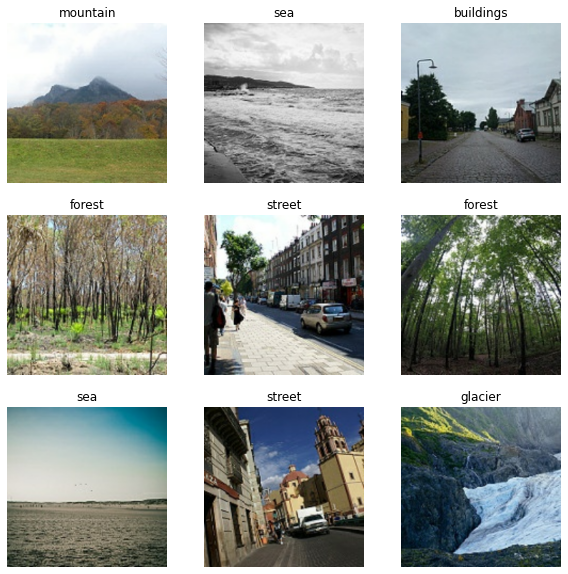

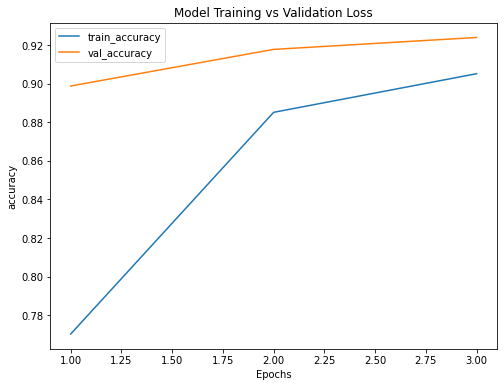

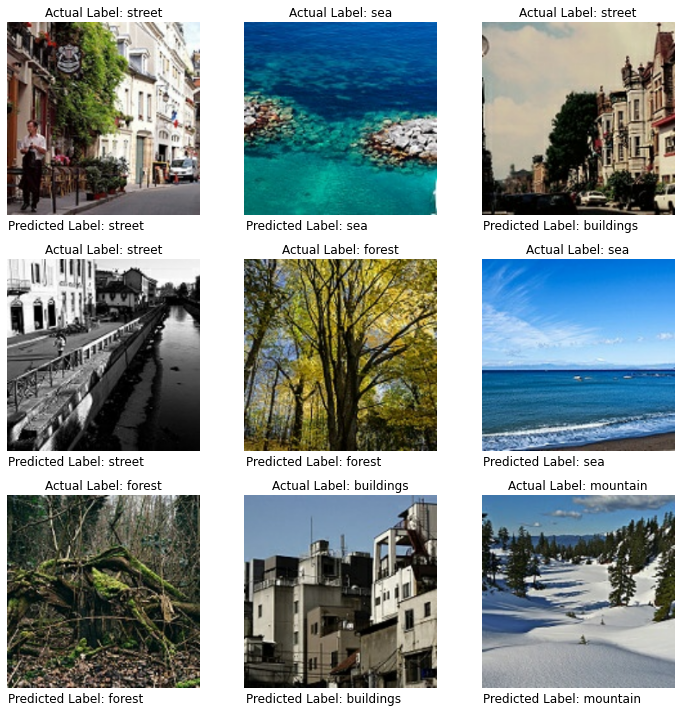

In [29]:
model, dicti = deepauto.fit("", target, keras_model_type=keras_model_type, 
                            project_name='image_classification',
                 save_model_flag=False, model_options=model_options,model_use_case='',
                            keras_options=keras_options, use_my_model='', verbose=0)

In [31]:
predictions = deepauto.predict_images(test_image_dir, model, dicti,keras_model_type)


Loading deep_autoviml model from <tensorflow.python.keras.engine.sequential.Sequential object at 0x7feeaa9a3a90> folder. This will take time...

Using <tensorflow.python.keras.engine.sequential.Sequential object at 0x7feeaa9a3a90> model provided as input...
Time taken to load saved model = 0 seconds
    loading and predicting on folder: /content/data_folder/test
Found 1408 files belonging to 6 classes.
    Sample predictions before inverse_transform: [3 5 0 0 3]
    Sample predictions after inverse_transform: ['mountain' 'street' 'buildings' 'buildings' 'mountain']
